<a href="https://colab.research.google.com/github/OmkarSolat/Data-Science-at-ExcelR/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ARIMA**
(Auto-Regressive Integrated Moving Average)

In [ ]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
#Read the AirPassengers dataset
airline = pd.read_csv('/content/airline-passengers.csv',index_col ='Month',parse_dates = True)

In [ ]:
#Print the first five rows of the dataset
airline.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


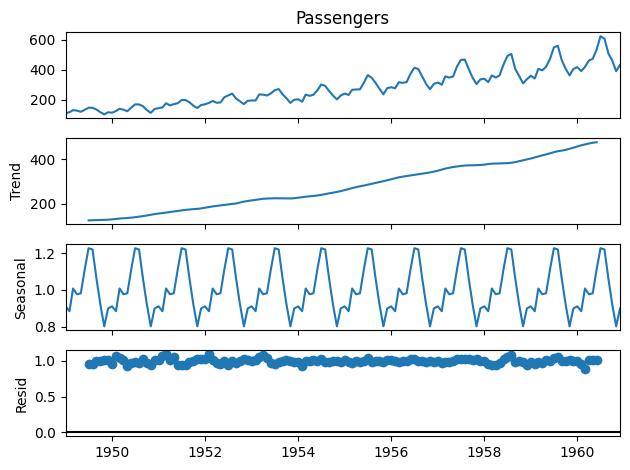

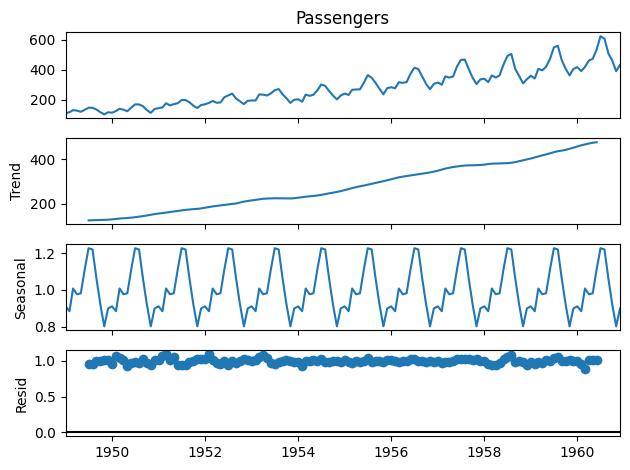

In [ ]:
#ETS Decomposition
result = seasonal_decompose(airline["Passengers"],model ='multiplicative')
result.plot()

In [ ]:
#To install the library
!pip install pmdarima

In [ ]:
#Import the library
from pmdarima import auto_arima
#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise

#To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=1022.299, Time=0.83 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1031.508, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1020.393, Time=0.25 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1021.003, Time=0.62 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1020.393, Time=0.07 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1019.239, Time=0.34 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=11.16 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=1020.493, Time=2.95 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1032.120, Time=1.04 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.120, Time=1.74 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1021.032, Time=6.32 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1019.178, Time=1.17 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=1020.425, Time=0.49 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=inf, Time=2.87 sec
 ARIMA(0,1,1)(1,1,1)[12]    

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(2, 1, [], 12)   Log Likelihood                -505.589
Date:                             Fri, 23 Aug 2024   AIC                           1019.178
Time:                                     16:27:42   BIC                           1030.679
Sample:                                 01-01-1949   HQIC                          1023.851
                                      - 12-01-1960                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3634      0.074     -4.945      0.000      -0.508      -0.219
ar.S.L12      -0.1239      0.090     -1.372      0.170      -0.301       0.053
ar.S.L24       0.1911      0.107      1.783      0.075      -0.019       0.401
sigma2       130.4480     15.527      8.402      0.000     100.016     160.880
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 4.59
Prob(Q):                              0.92   Prob(JB):                         0.10
Heteroskedasticity (H):               2.70   Skew:                             0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#Splitting data
train = airline.iloc[:len(airline)-12]
test = airline.iloc[len(airline)-12:]  #set one year(12 months) for testing

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train['Passengers'],order = (0, 1, 1),seasonal_order =(2, 1, 0, 12)).fit()

<Axes: xlabel='Month'>

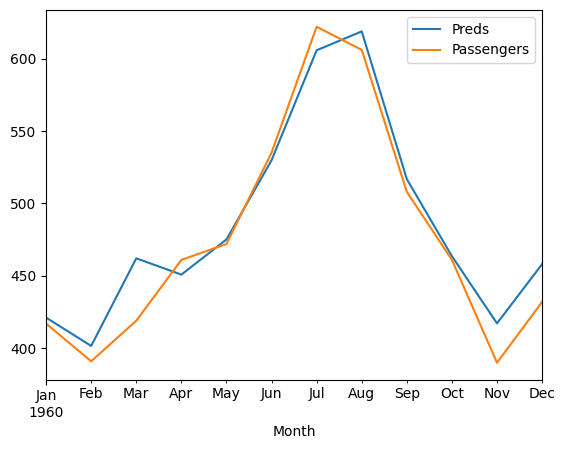

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

#Predictions for one-year against the test set
predictions = model.predict(start, end, typ = 'levels').rename("Preds")

#plot predictions and actual values
predictions.plot(legend = True)
test['Passengers'].plot(legend = True)

<Axes: xlabel='Month'>

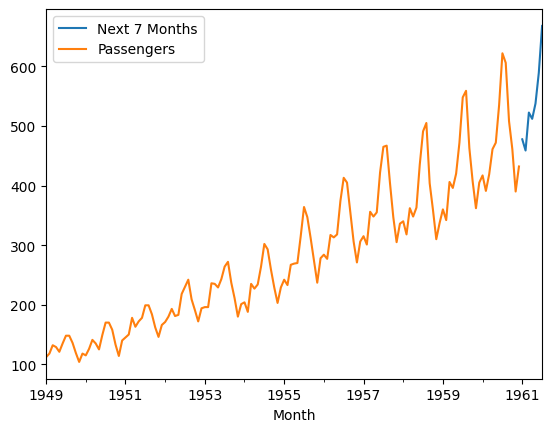

In [ ]:
#Predict next 7 months
next_7_months = model.predict(start=len(airline), end=len(airline)+6).rename("Next 7 Months")
next_7_months.plot(legend=True)
airline['Passengers'].plot(legend = True)
